In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

#### Reading and Understanding the Data

In [3]:
Leads=pd.read_csv(r'G:\Upgrad\Machine Learning Assignment\Logistic Regression\Leads.csv')

In [4]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspecting Dataframe

In [5]:
Leads.shape

(9240, 37)

In [6]:
# Checking for the duplicates
Leads['Prospect ID'].duplicated().sum()

0

#### Data Cleaning Steps & EDA
- Handling Categorical Variables with "Select" values. We can notice there are many 'Select' values present in multiple categorical columns. This might be beacause these feilds in the website might be non mandatory fields with drop downs options for the customer to choose from. Amongst the dropdown values, the default option is probably 'Select' and since these aren't mandatory fields, many customer might have chosen to leave it as the default value 'Select'. And customer did not select any option from that list, hence it shows as select So its equivalent to Null value. Therefore we'll treat it as null value or else we will check if we can impute some other values inplace of it

In [7]:
Leads = Leads.replace('Select', np.nan)

In [8]:
# Checking for the nulls present in data
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Removing dropping columns which have more than 40% nulls

In [9]:
# Removing all the columns that are no required and have 35% null values
Leads = Leads.drop(['How did you hear about X Education', 
                   'Asymmetrique Activity Index',
                   'Asymmetrique Activity Score',
                   'Asymmetrique Profile Index',
                   'Asymmetrique Profile Score',
                   'Lead Profile',
                   'Lead Quality'], axis=1)

# Removing score variables apart from above high percentage of missing values column's.
Leads = Leads.drop(['Tags'], axis=1)

In [10]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### EDA

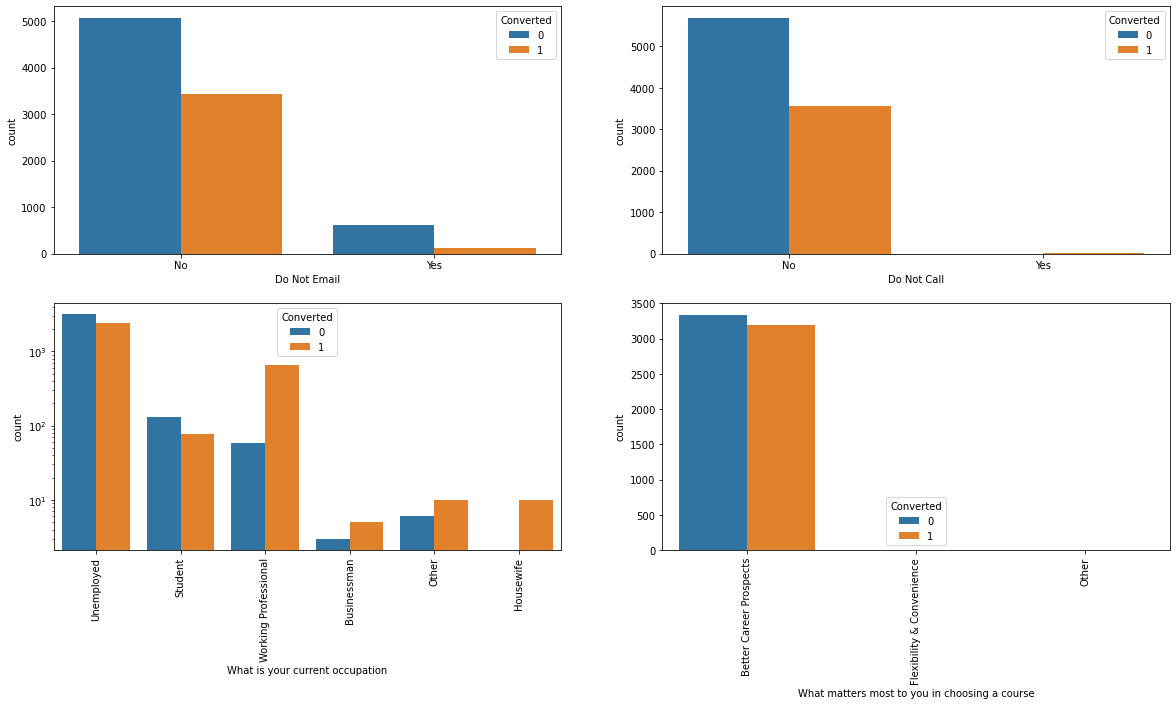

In [11]:
# plotting the plots of Do Not Email & Do Not Call side by side
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

sns.countplot(x='Do Not Email', hue='Converted', data=Leads)
plt.subplot(2,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data=Leads)

plt.subplot(2,2,3)
chart = sns.countplot(x='What is your current occupation', hue='Converted',data=Leads)
plt.yscale('log')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)

plt.subplot(2,2,4)
chart = sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=Leads)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)

plt.show()


- People who are not receiving any kind of call or email are converging more that who are receiving email or call notifications related to course.
- Rate of convergence among students, unemployed, working professional & housewife is higher than any other occupation.

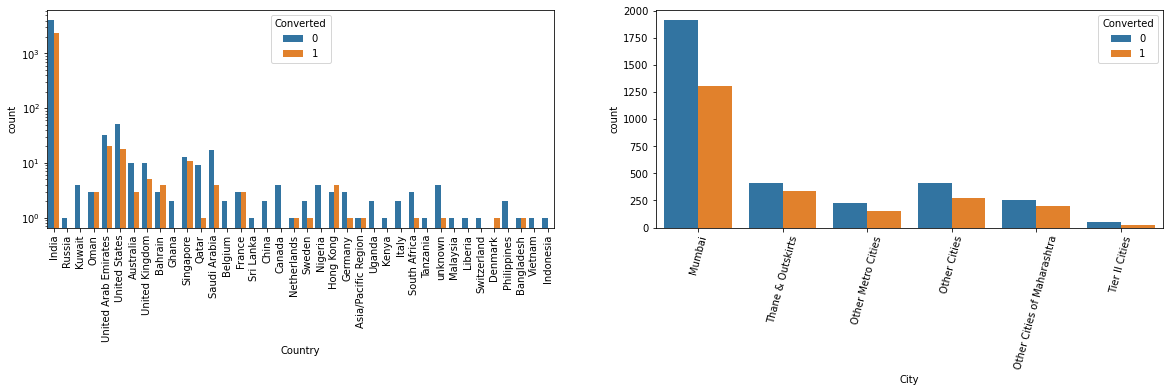

In [12]:
# plotting leads convergence distribution in country
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
chart = sns.countplot(x='Country', hue='Converted', data=Leads)
plt.yscale('log')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.countplot(x='City', hue='Converted', data=Leads)
#plt.yscale('l')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)

plt.show()

#### Country Analysis Results -
- Countries like singapore & denmark are moving towards the online education platform as it is easy & convenient as people can get upskill or go for higher education while engaged at different work at the same time.
- In India also online education is gaining traction as customers convergence is not much less from non convergence.

#### City  Analysis Results -
- From the data it is visible that customers from cities of Maharastra are more opting for online education platform.

In [13]:
# Checking unique values of column 'City'
Leads['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [14]:
# Majority of the data is Mun=mbai so we can impute Mumbai in the missing values.
Leads['City'] = Leads['City'].replace(np.nan, 'Other than Mumbai')

In [15]:
Leads['City'].value_counts(normalize=True)

Other than Mumbai              0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [16]:
# unique value distribution of lead origin
print(Leads['Lead Origin'].value_counts(normalize=True)*100)
print()
print(Leads['Lead Source'].value_counts())


Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
blog                    1
Name: Lead Source, dtype: int64


In [17]:
Leads['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Social Media         0.000217
Live Chat            0.000217
Press_Release        0.000217
WeLearn              0.000109
youtubechannel       0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
Pay per Click Ads    0.000109
testone              0.000109
blog                 0.000109
Name: Lead Source, dtype: float64

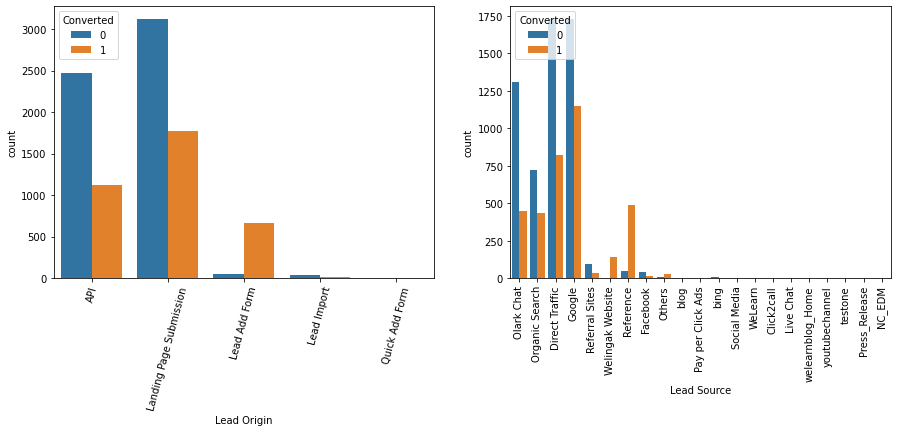

In [18]:
# Leads Source has Google and google. Change it to Google
Leads['Lead Source'] = Leads['Lead Source'].replace('google', 'Google')
Leads['Lead Source'] = Leads['Lead Source'].replace(np.nan, 'Others')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
chart = sns.countplot(x='Lead Origin', hue='Converted', data=Leads)
chart.set_xticklabels(chart.get_xticklabels(), rotation=75)
plt.subplot(1,2,2)

chart = sns.countplot(x='Lead Source', hue='Converted', data=Leads)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Lead Origin Analysis -
- API and Landing Page Submission have 40-45% (observable from count in y-axis) conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

#### Lead Source Analysis -
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website & reference is high as compared to non convergence leads.
##### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [19]:
Leads['Lead Source']=np.where(Leads['Lead Source'].isin(['Google',
                                                         'Direct Traffic',
                                                         'Olark Chat',
                                                         'Organic Search']),Leads['Lead Source'],'Others')
Leads['Lead Source'].value_counts(normalize=True)

Google            0.310931
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Others            0.099026
Name: Lead Source, dtype: float64

In [20]:
Leads['Last Activity']=np.where(Leads['Last Activity'].isin(['Email Opened',
                                                         'SMS Sent',
                                                         'Olark Chat Conversation']),Leads['Last Activity'],'Others')

Leads['Last Activity'].value_counts(normalize=True)

Email Opened               0.371970
SMS Sent                   0.297078
Others                     0.225649
Olark Chat Conversation    0.105303
Name: Last Activity, dtype: float64

In [21]:
# Checking unique values of column 'Specialization'
Leads['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

#### Inference: 
This particular column tells about the industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
    
- It maybe the case that customer has not entered any specialization if his/her option is not available on the list.
- As customer may nit have any specialization or is a student
- Hence we can make a category "Others" inplace of 'Select'

In [22]:
Leads['Specialization'] = Leads['Specialization'].replace(np.nan, 'Others')
Leads['Specialization'].value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

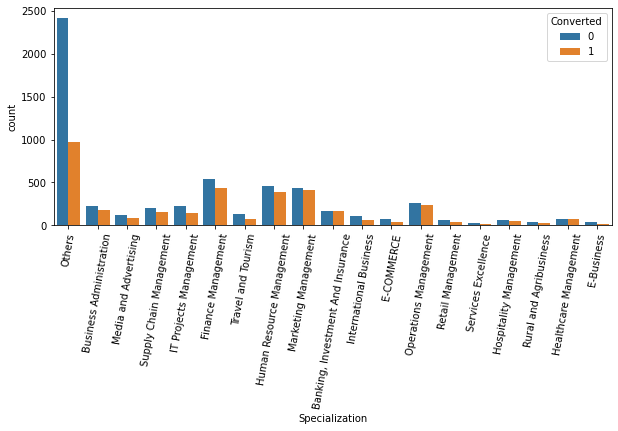

In [23]:
# plot of leads convergence distribution among various categories of customers
plt.figure(figsize=(10,4))
chart = sns.countplot(x='Specialization', hue='Converted', data=Leads)
# plt.yscale('log')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

- Focus should be more on specialization with high conversion rate.
- From the plot it is clear customers from multiple management streams are opting for online education platform & their convergance rate is also higher.

In [24]:
Leads['Specialization'] = np.where(Leads['Specialization'] != 'Finance Management', 'Others', Leads['Specialization'])

In [25]:
Leads['Specialization'].value_counts(normalize=True)

Others                0.894372
Finance Management    0.105628
Name: Specialization, dtype: float64

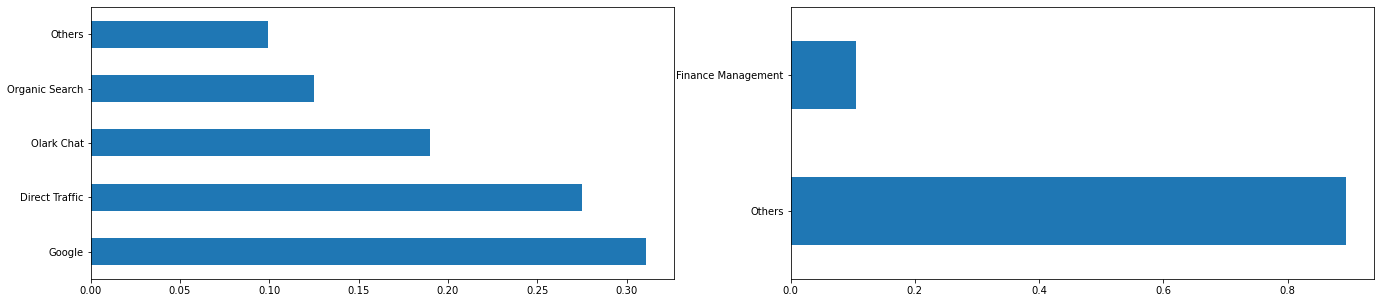

In [26]:
# Plot
fig = plt.figure(figsize=(23,5))

plt.subplot(1,2,1)
Leads['Lead Source'].value_counts(normalize=True).plot.barh()

plt.subplot(1,2,2)
Leads['Specialization'].value_counts(normalize=True).plot.barh()

plt.show()

Email Opened               3437
SMS Sent                   2745
Others                     2085
Olark Chat Conversation     973
Name: Last Activity, dtype: int64


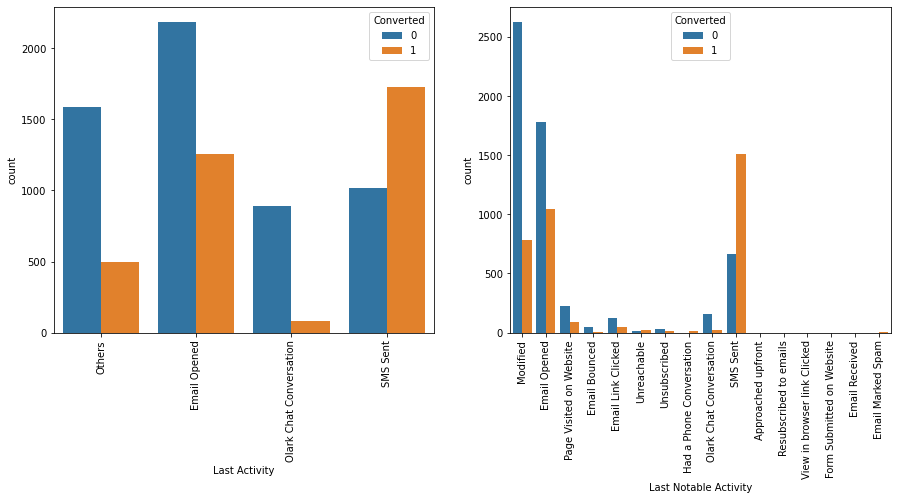

In [27]:
# plotting lead convergence in terms of lead activity 
print(Leads['Last Activity'].value_counts())

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
chart = sns.countplot(x='Last Activity', hue='Converted', data=Leads)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.countplot(x='Last Notable Activity', hue='Converted', data=Leads)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

- Conversion rate for leads with last activity as SMS Sent is almost 70% (as observable from the plot).
- Most of them lead have were either working on checking Email as their last activity.

#### Univariate Analysis

Here, we will be checking more about the nature of categorical variable like

- what are the categories present
- Understanding more about skewness present in data.

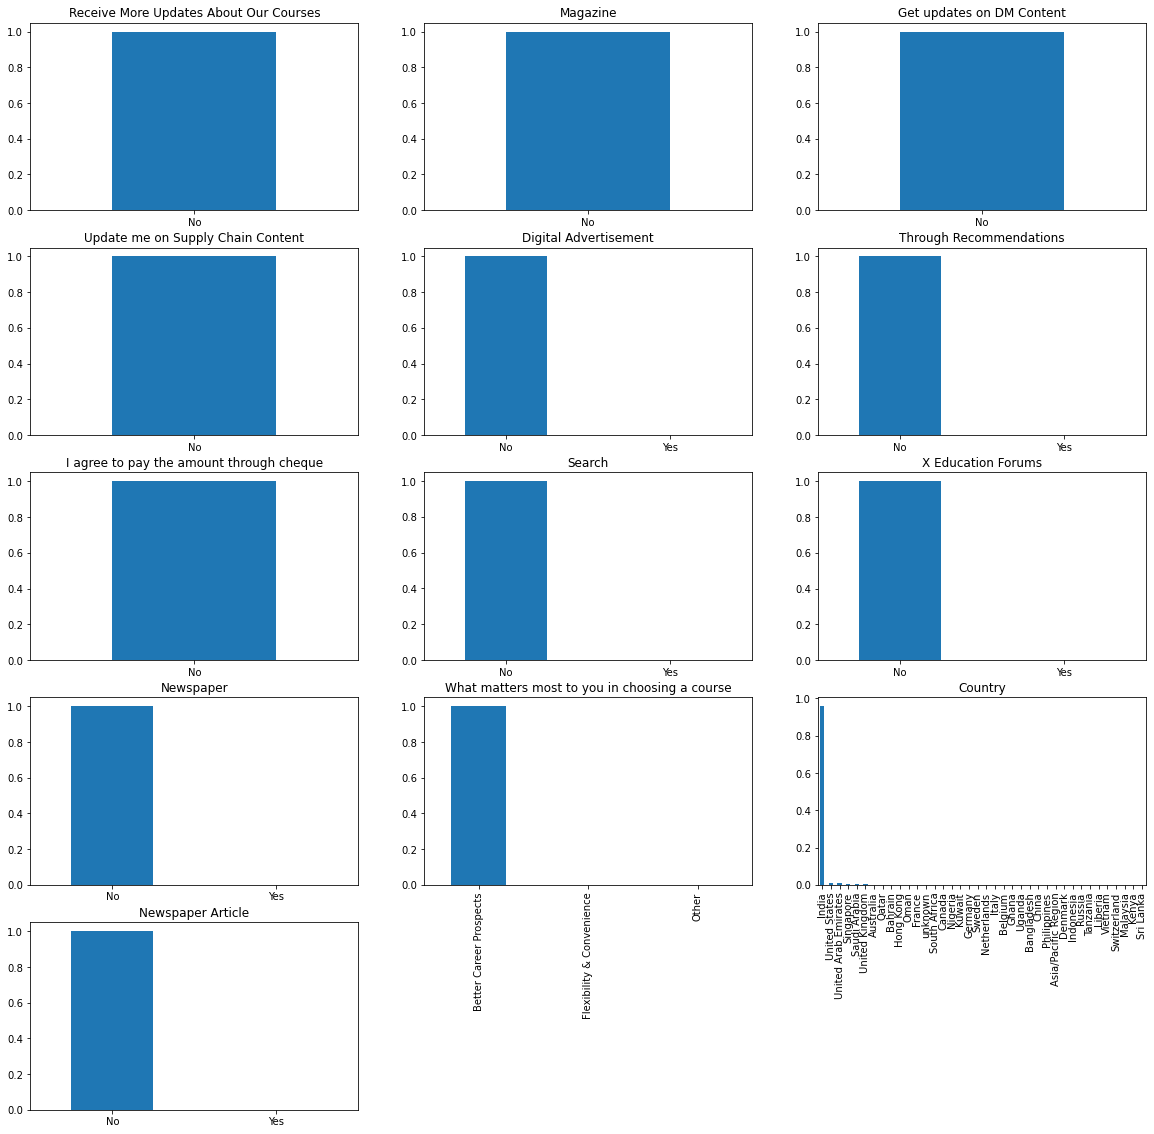

In [28]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5,3,1)
Leads['Receive More Updates About Our Courses'].value_counts(normalize=True).plot.bar()
plt.title('Receive More Updates About Our Courses')
plt.xticks(rotation=0)

plt.subplot(5,3,2)
Leads['Magazine'].value_counts(normalize=True).plot.bar()
plt.title('Magazine')
plt.xticks(rotation=0)

plt.subplot(5,3,3)
Leads['Get updates on DM Content'].value_counts(normalize=True).plot.bar()
plt.title('Get updates on DM Content')
plt.xticks(rotation=0)

plt.subplot(5,3,4)
Leads['Update me on Supply Chain Content'].value_counts(normalize=True).plot.bar()
plt.title('Update me on Supply Chain Content')
plt.xticks(rotation=0)

plt.subplot(5,3,5)
Leads['Digital Advertisement'].value_counts(normalize=True).plot.bar()
plt.title('Digital Advertisement')
plt.xticks(rotation=0)

plt.subplot(5,3,6)
Leads['Through Recommendations'].value_counts(normalize=True).plot.bar()
plt.title('Through Recommendations')
plt.xticks(rotation=0)

plt.subplot(5,3,7)
Leads['I agree to pay the amount through cheque'].value_counts(normalize=True).plot.bar()
plt.title('I agree to pay the amount through cheque')
plt.xticks(rotation=0)

plt.subplot(5,3,8)
Leads['Search'].value_counts(normalize=True).plot.bar()
plt.title('Search')
plt.xticks(rotation=0)

plt.subplot(5,3,9)
Leads['X Education Forums'].value_counts(normalize=True).plot.bar()
plt.title('X Education Forums')
plt.xticks(rotation=0)

plt.subplot(5,3,10)
Leads['Newspaper'].value_counts(normalize=True).plot.bar()
plt.title('Newspaper')
plt.xticks(rotation=0)

plt.subplot(5,3,11)
Leads['What matters most to you in choosing a course'].value_counts(normalize=True).plot.bar()
plt.title('What matters most to you in choosing a course')


plt.subplot(5,3,12)
Leads['Country'].value_counts(normalize=True).plot.bar()
plt.title('Country')

plt.subplot(5,3,13)
Leads['Newspaper Article'].value_counts(normalize=True).plot.bar()
plt.title('Newspaper Article')
plt.xticks(rotation=0)

plt.show()

In [29]:
Leads = Leads.drop(['Receive More Updates About Our Courses',
                   'Magazine',
                   'Get updates on DM Content',
                   'Update me on Supply Chain Content',
                   'What matters most to you in choosing a course',
                   'Country',
                   'I agree to pay the amount through cheque',
                   'Search',
                   'X Education Forums',
                   'Newspaper',
                   'Digital Advertisement',
                   'Through Recommendations',
                   'Do Not Email',
                   'Do Not Call',                 
                   'Newspaper Article'], axis =1)

Based on above univariate Analysis, we can conclude that below column's are highly skewed and will not add any value to the model

- Receive More Updates About Our Courses
- Magazine
- Get updates on DM Content
- Update me on Supply Chain Content
- What matters most to you in choosing a course
- Country
- I agree to pay the amount through cheque
- Search
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Newspaper Article

Therefore dropping these values

In [30]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              0.00
Specialization                             0.00
What is your current occupation           29.11
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [31]:
Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.nan, 'Other')
Leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.606061
Other                   0.292857
Working Professional    0.076407
Student                 0.022727
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [32]:
Leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
What is your current occupation             0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [33]:
Leads.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [34]:
# dropping null records for numerical column's
Leads = Leads.dropna()

In [35]:
Leads.shape

(9103, 14)

#### Outlier Analysis

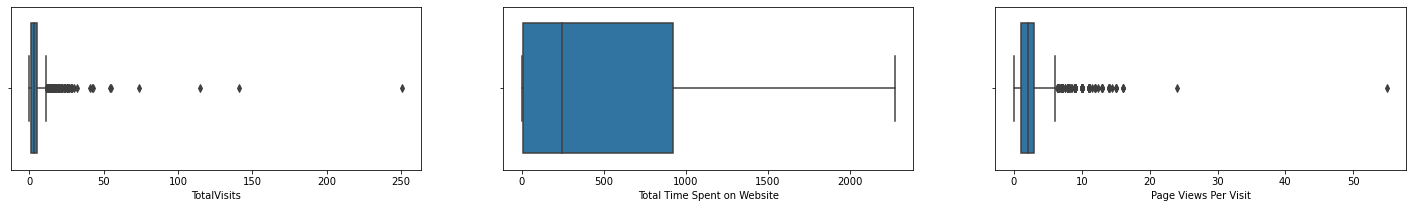

In [36]:
fig = plt.figure(figsize=(25,3))

plt.subplot(1,3,1)
sns.boxplot(Leads['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(Leads['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(Leads['Page Views Per Visit'])

plt.show()

#### As we can see above 3 numerical variables have some outliers present, so we need to handle these

In [37]:
q1 = Leads.TotalVisits.quantile(0.05)
q3 = Leads.TotalVisits.quantile(0.90)

q1 = Leads.TotalVisits.quantile(0.25)
q3 = Leads.TotalVisits.quantile(0.75)
IQR = q3-q1 #Interquartile range
fence_low  = q1-1.5*IQR
fence_high = q3+1.5*IQR
Leads = Leads.loc[(Leads.TotalVisits > fence_low) & (Leads.TotalVisits < fence_high)]

q1 = Leads['Page Views Per Visit'].quantile(0.25)
q3 = Leads['Page Views Per Visit'].quantile(0.75)
IQR = q3-q1 #Interquartile range
fence_low  = q1-1.5*IQR
fence_high = q3+1.5*IQR

Leads = Leads.loc[(Leads['Page Views Per Visit'] > fence_low) & (Leads['Page Views Per Visit'] < fence_high)]


In [38]:
Leads.shape

(8599, 14)

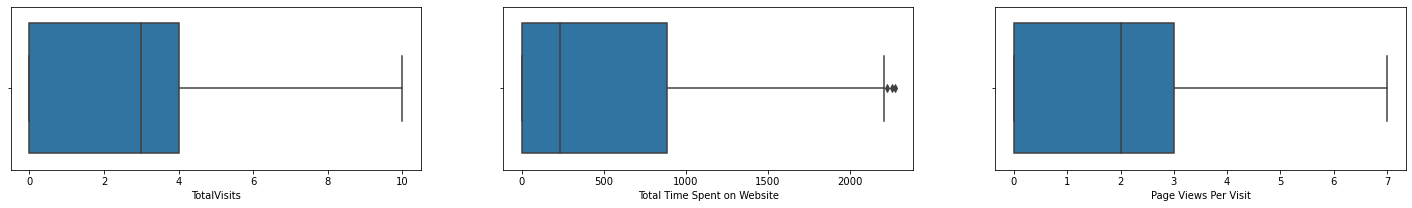

In [39]:
fig = plt.figure(figsize=(25,3))

plt.subplot(1,3,1)
sns.boxplot(Leads['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(Leads['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(Leads['Page Views Per Visit'])

plt.show()

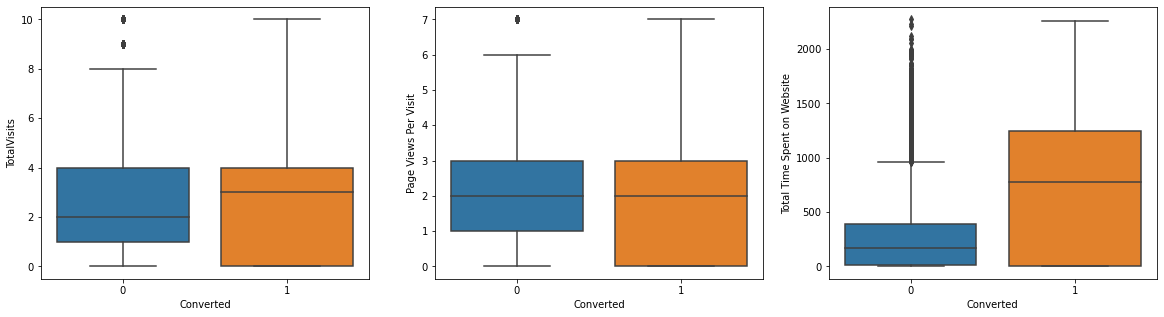

In [40]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
# boxplot of totalVisits in terms of leadconvergence
sns.boxplot(y='TotalVisits', x='Converted', data=Leads)

plt.subplot(1,3,2)
# boxplot of total time spent on website in terms of lead convergence
sns.boxplot(y=Leads['Page Views Per Visit'], x=Leads['Converted'])

plt.subplot(1,3,3)
# boxplot of lead convergence in terms of lead convergence
sns.boxplot(y=Leads['Total Time Spent on Website'], x=Leads['Converted'])
plt.show()

- TotalVisits - Median for converted and not converted leads are almost same.
- Page Views Per Visit - Median for converted and unconverted leads is the same.
- Leads spending more time on the website are more likely to be converted.

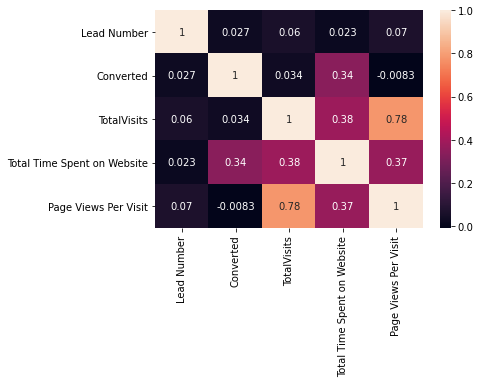

In [41]:
# heatmap of correlation of numerical column
sns.heatmap(Leads.corr(), annot=True)
plt.show()

#### For Categorical variables with multiple levels, create dummy features (one-hot encoded)

In [42]:
# Creating a dummy variable for some of the categorical variables and dropping the first one
dummy = pd.get_dummies(Leads[['Lead Origin',
                            'Lead Source',
                            'Last Activity',
                            'Specialization',
                            'City',
                            'What is your current occupation',
                            'A free copy of Mastering The Interview',
                            'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

#### Dropping the repeated variables

In [43]:
Leads= Leads.drop(['Lead Origin',
                  'Lead Source',
                  'Last Activity',
                  'Specialization',
                  'City',
                  'A free copy of Mastering The Interview',
                  'What is your current occupation',
                  'Last Notable Activity',
                  'Prospect ID',
                  'Lead Number'], axis=1)

In [44]:
len(Leads.columns)

42

In [45]:
Leads.shape

(8599, 42)

In [46]:
#### Checking the Conversion Rate 
ConversionRate = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100 
ConversionRate

37.63228282358414

- From the above figures it is observed that dataset is imbalanced.
- Records of leads not converted are higher than that of converted leads.

#### Importing Necessary Libraries for Logistic Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [48]:
# Putting feature variable to X
X = Leads.drop(['Converted'], axis=1)

# Putting feature variable to Y
y = Leads['Converted']

####  Splitting the dataframe into test and train in the ratio of 30 & 70 respectively

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state =100)

In [50]:
# dimension of train & test dataframe
print('X_train shape:-',X_train.shape)
print('X_test shape:-',X_test.shape)
print('y_train shape:-', y_train.shape)
print('y_test shape:-', y_test.shape)

X_train shape:- (6019, 41)
X_test shape:- (2580, 41)
y_train shape:- (6019,)
y_test shape:- (2580,)


In [51]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other than Mumbai,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4248,3.0,91,1.50,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6779,2.0,96,2.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8284,6.0,329,3.00,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3863,8.0,310,2.67,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1703,3.0,37,3.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [52]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other than Mumbai,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4248,0.074012,-0.698561,-0.366001,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6779,-0.343496,-0.689392,-0.078829,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8284,1.326537,-0.262092,0.495515,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3863,2.161553,-0.296936,0.305981,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1703,0.074012,-0.797592,0.495515,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


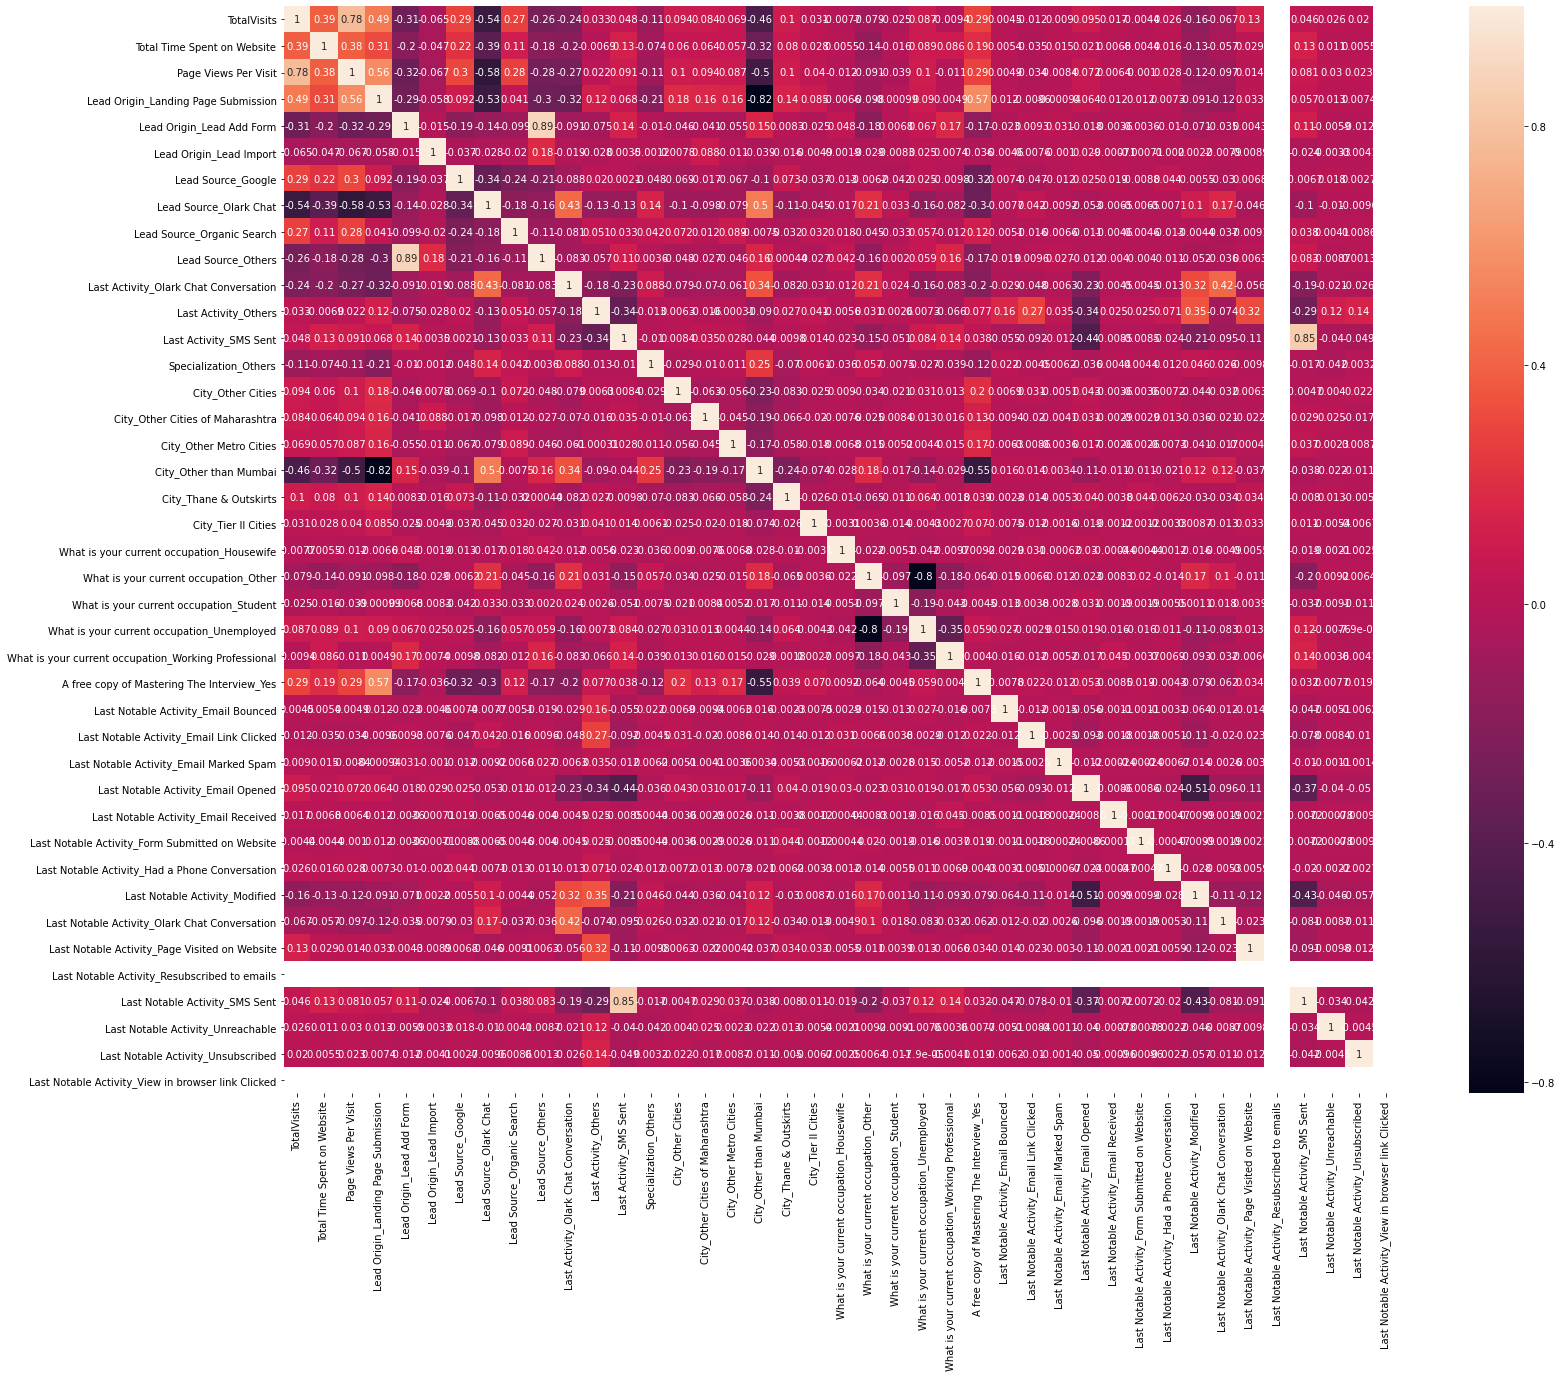

In [53]:
# heatmap of correlation matrix train dataframe
plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Model Building

#### Running Your First Training Model

In [54]:
# Logistic regression model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5980
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Sep 2020   Deviance:                          nan
Time:                        09:33:52   Pearson chi2:                 6.00e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.269e+15   3.75e+07   3.39e+07      0.000    1.27e+15    1.27e+15
TotalVisits                                           4.092e+13   1.49e+06   2.75e+07      0.000    4.09e+13    4.09e+13
Total Time Spent on Website                           3.214e+13   1.01e+06   3.18e+07      0.000    3.21e+13    3.21e+13
Page Views Per Visit                                 -6.341e+12   1.58e+06  -4.01e+06      0.000   -6.34e+12   -6.34e+12
Lead Origin_Landing Page Submission                  -9.056e+14   3.68e+06  -2.46e+08      0.000   -9.06e+14   -9.06e+14
Lead Origin_Lead Add Form                             1.163e+15   8.71e+06   1.33e+08      0.000    1.16e+15    1.16e+15
Lead Origin_Lead Import                               2.643e+14   1.81e+07   1.46e+07      0.000    2.64e+14    2.64e+14
Lead Source_Google                                    4.611e+13   2.96e+06   1.56e+07      0.000    4.61e+13    4.61e+13
Lead Source_Olark Chat                                1.653e+14   4.14e+06   3.99e+07      0.000    1.65e+14    1.65e+14
Lead Source_Organic Search                           -5.128e+13   3.41e+06   -1.5e+07      0.000   -5.13e+13   -5.13e+13
Lead Source_Others                                   -1.467e+14   8.04e+06  -1.82e+07      0.000   -1.47e+14   -1.47e+14
Last Activity_Olark Chat Conversation                -3.318e+14   4.57e+06  -7.26e+07      0.000   -3.32e+14   -3.32e+14
Last Activity_Others                                 -2.729e+14   4.02e+06  -6.78e+07      0.000   -2.73e+14   -2.73e+14
Last Activity_SMS Sent                                9.122e+13   4.73e+06   1.93e+07      0.000    9.12e+13    9.12e+13
Specialization_Others                                -1.106e+14   2.95e+06  -3.75e+07      0.000   -1.11e+14   -1.11e+14
City_Other Cities                                     1.088e+14   3.56e+06   3.06e+07      0.000    1.09e+14    1.09e+14
City_Other Cities of Maharashtra                     -2.987e+13   4.25e+06  -7.02e+06      0.000   -2.99e+13   -2.99e+13
City_Other Metro Cities                              -5.039e+13   4.73e+06  -1.06e+07      0.000   -5.04e+13   -5.04e+13
City_Other than Mumbai                               -9.457e+14   3.59e+06  -2.63e+08      0.000   -9.46e+14   -9.46e+14
City_Thane & Outskirts                                1.943e+13   3.45e+06   5.64e+06      0.000    1.94e+13    1.94e+13
City_Tier II Cities                                  -7.008e+13   9.88e+06  -7.09e+06      0.000   -7.01e+13   -7.01e+13
What is your current occupation_Housewife              4.01e+15   4.65e+07   8.62e+07      0.000    4.01e+15    4.01e+15
What is your current occupation_Other                -2.98

###  Feature Selection Using RFE

In [55]:
logreg = LogisticRegression()
rfe = RFE(logreg, 25)            # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Others', False, 10),
 ('City_Other Cities', False, 8),
 ('City_Other Cities of Maharashtra', False, 13),
 ('City_Other Metro Cities', False, 14),
 ('City_Other than Mumbai', True, 1),
 ('City_Thane & Outskirts', False, 11),
 ('City_Tier II Cities', False, 6),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemploy

In [57]:
col = X_train.columns[rfe.support_]

In [58]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Organic Search',
       'Specialization_Others', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

#### Model - 1 

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5993
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2367.6
Date:                Mon, 07 Sep 2020   Deviance:                       4735.2
Time:                        09:33:55   Pearson chi2:                 6.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0566      1.545      0.684      0.494      -1.971       4.084
TotalVisits                                              0.3204      0.058      5.533      0.000       0.207       0.434
Total Time Spent on Website                              1.0732      0.043     25.149      0.000       0.990       1.157
Page Views Per Visit                                    -0.2731      0.062     -4.373      0.000      -0.395      -0.151
Lead Origin_Landing Page Submission                     -0.9338      0.149     -6.253      0.000      -1.227      -0.641
Lead Origin_Lead Add Form                                3.5489      0.354     10.023      0.000       2.855       4.243
Lead Source_Google                                       0.3605      0.088      4.098      0.000       0.188       0.533
Lead Source_Olark Chat                                   1.5169      0.161      9.405      0.000       1.201       1.833
Lead Source_Others                                       0.3789      0.294      1.288      0.198      -0.198       0.955
Last Activity_Olark Chat Conversation                   -1.5334      0.233     -6.570      0.000      -1.991      -1.076
Last Activity_Others                                    -1.1087      0.171     -6.468      0.000      -1.445      -0.773
Last Activity_SMS Sent                                   0.4578      0.178      2.578      0.010       0.110       0.806
City_Other than Mumbai                                  -0.9615      0.140     -6.890      0.000      -1.235      -0.688
What is your current occupation_Housewife               22.0621   1.49e+04      0.001      0.999   -2.91e+04    2.92e+04
What is your current occupation_Other                   -1.6715      1.533     -1.091      0.275      -4.675       1.332
What is your current occupation_Student                 -0.4122      1.547     -0.267      0.790      -3.444       2.620
What is your current occupation_Unemployed              -0.4634      1.531     -0.303      0.762      -3.464       2.537
What is your current occupation_Working Professional     1.9187      1.541      1.245      0.213      -1.102       4.940
Last Notable Activity_Email Bounced                     -0.9068      0.497     -1.826      0.068      -1.880       0.067
Last Notable Activity_Email Marked Spam                 20.8925   3.37e+04      0.001      1.000   -6.61e+04    6.61e+04
Last Notable Activity_Email Opened                      -0.9144      0.194     -4.717      0.000      -1.294      -0.534
Last Notable Activity_Had a Phone Conversation           3.2628      1.180      2.765      0.006       0.950       5.575
Last Notable Activity_Modified                          -1

In [60]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4248    0.017673
6779    0.147969
8284    0.291926
3863    0.230400
1703    0.043193
7750    0.912133
1508    0.073355
4597    0.170963
1819    0.750346
8705    0.185847
dtype: float64

In [61]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01767346, 0.14796941, 0.29192551, 0.23039979, 0.0431929 ,
       0.91213327, 0.07335511, 0.17096312, 0.75034602, 0.18584679])

#### Creating a dataframe with the actual Lead flag and the predicted probabilities

In [62]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Prob,ID
0,0,0.017673,4248
1,0,0.147969,6779
2,1,0.291926,8284
3,0,0.230400,3863
4,0,0.043193,1703


#### Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0

In [63]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.017673,4248,0
1,0,0.147969,6779,0
2,1,0.291926,8284,0
3,0,0.230400,3863,0
4,0,0.043193,1703,0


In [64]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3322  405]
 [ 649 1643]]


In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.8248878551254362


In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# sensitivity model
print('Sensitivity -',TP / float(TP+FN))

# specificity
print('Specificity -',TN / float(TN+FP))

Sensitivity - 0.7168411867364747
Specificity - 0.8913335122082103


#### Checking VIFs

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,27.05
13,What is your current occupation_Other,14.79
19,Last Notable Activity_Email Opened,9.63
3,Lead Origin_Landing Page Submission,8.81
10,Last Activity_SMS Sent,7.92
7,Lead Source_Others,5.82
4,Lead Origin_Lead Add Form,5.79
11,City_Other than Mumbai,5.67
21,Last Notable Activity_Modified,5.23
9,Last Activity_Others,4.33


Identified below columns which have both high P value & VIF & there dropping these from next model

#### Insignificant features - 
- Last Notable Activity_Email Marked Spam
- What is your current occupation_Housewife
- What is your current occupation_Student
- What is your current occupation_Unemployed
- What is your current occupation_Other
- What is your current occupation_Working Professional
- Lead Source_Others

#### High VIf Features -

- What is your current occupation_Unemployed
- What is your current occupation_Other
- Last Notable Activity_Email Opened
- Lead Origin_Landing Page Submission
- Last Activity_SMS Sent
- Lead Source_Others
- Lead Origin_Lead Add Form

#### Model - 2

In [68]:
col = col.drop(['What is your current occupation_Unemployed','What is your current occupation_Other'], 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'City_Other than Mumbai',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [69]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5995
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2459.0
Date:                Mon, 07 Sep 2020   Deviance:                       4918.0
Time:                        09:33:57   Pearson chi2:                 6.45e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6159      0.234      2.637      0.008       0.158       1.074
TotalVisits                                              0.2904      0.057      5.100      0.000       0.179       0.402
Total Time Spent on Website                              1.0675      0.042     25.564      0.000       0.986       1.149
Page Views Per Visit                                    -0.2532      0.061     -4.125      0.000      -0.374      -0.133
Lead Origin_Landing Page Submission                     -1.0552      0.147     -7.154      0.000      -1.344      -0.766
Lead Origin_Lead Add Form                                3.8322      0.351     10.924      0.000       3.145       4.520
Lead Source_Google                                       0.3183      0.087      3.677      0.000       0.149       0.488
Lead Source_Olark Chat                                   1.3555      0.158      8.599      0.000       1.047       1.664
Lead Source_Others                                       0.3508      0.289      1.215      0.224      -0.215       0.917
Last Activity_Olark Chat Conversation                   -1.5519      0.229     -6.789      0.000      -2.000      -1.104
Last Activity_Others                                    -1.1340      0.169     -6.715      0.000      -1.465      -0.803
Last Activity_SMS Sent                                   0.3782      0.172      2.203      0.028       0.042       0.715
City_Other than Mumbai                                  -1.1575      0.138     -8.391      0.000      -1.428      -0.887
What is your current occupation_Housewife               22.7428   1.46e+04      0.002      0.999   -2.87e+04    2.87e+04
What is your current occupation_Student                  0.3806      0.236      1.611      0.107      -0.082       0.844
What is your current occupation_Working Professional     2.6735      0.191     14.033      0.000       2.300       3.047
Last Notable Activity_Email Bounced                     -0.9159      0.495     -1.849      0.065      -1.887       0.055
Last Notable Activity_Email Marked Spam                 20.9388   3.37e+04      0.001      1.000   -6.61e+04    6.61e+04
Last Notable Activity_Email Opened                      -1.0688      0.188     -5.685      0.000      -1.437      -0.700
Last Notable Activity_Had a Phone Conversation           3.0859      1.154      2.675      0.007       0.825       5.347
Last Notable Activity_Modified                          -1.2622      0.127     -9.953      0.000      -1.511      -1.014
Last Notable Activity_Olark Chat Conversation           -1.0807      0.400     -2.699      0.007      -1.865      -0.296
Last Notable Activity_Page Visited on Website           -0

In [70]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03729218, 0.1083446 , 0.22972966, 0.17961367, 0.0955686 ,
       0.91972288, 0.16584298, 0.13432289, 0.70756715, 0.15176801])

In [71]:
y_train_pred_final['Lead_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.037292,4248,0
1,0,0.108345,6779,0
2,1,0.229730,8284,0
3,0,0.179614,3863,0
4,0,0.095569,1703,0


In [72]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)
print()
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

[[3301  426]
 [ 668 1624]]

0.818242232929058


In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# sensitivity model
print('Sensitivity -',TP / float(TP+FN))

# specificity
print('Specificity -',TN / float(TN+FP))

Sensitivity - 0.7085514834205934
Specificity - 0.8856989535819694


#### Let's check the VIFs again

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,6.18
4,Lead Origin_Lead Add Form,5.74
7,Lead Source_Others,5.69
11,City_Other than Mumbai,4.43
17,Last Notable Activity_Email Opened,4.25
10,Last Activity_SMS Sent,3.99
19,Last Notable Activity_Modified,3.51
6,Lead Source_Olark Chat,3.38
2,Page Views Per Visit,3.21
9,Last Activity_Others,3.08


Identified below columns which have both high P value & VIF & there dropping these from next model

#### Insignificant features - 
- Last Notable Activity_Email Marked Spam
- What is your current occupation_Housewife
- What is your current occupation_Student
- What is your current occupation_Working Professional
- Lead Source_Others

#### High VIf Features -

- Lead Origin_Landing Page Submission
- Lead Source_Others
- Lead Origin_Lead Add Form

#### Dropping columns which are insignificant based on p value.

In [75]:
col = col.drop(['Last Notable Activity_Email Marked Spam','What is your current occupation_Housewife'], 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'City_Other than Mumbai',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model - 3

In [76]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5997
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2463.6
Date:                Mon, 07 Sep 2020   Deviance:                       4927.3
Time:                        09:33:59   Pearson chi2:                 6.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6280      0.233      2.692      0.007       0.171       1.085
TotalVisits                                              0.2901      0.057      5.103      0.000       0.179       0.402
Total Time Spent on Website                              1.0673      0.042     25.599      0.000       0.986       1.149
Page Views Per Visit                                    -0.2562      0.061     -4.176      0.000      -0.376      -0.136
Lead Origin_Landing Page Submission                     -1.0551      0.147     -7.163      0.000      -1.344      -0.766
Lead Origin_Lead Add Form                                3.8449      0.351     10.966      0.000       3.158       4.532
Lead Source_Google                                       0.3140      0.086      3.633      0.000       0.145       0.483
Lead Source_Olark Chat                                   1.3469      0.157      8.555      0.000       1.038       1.656
Lead Source_Others                                       0.3448      0.289      1.195      0.232      -0.221       0.910
Last Activity_Olark Chat Conversation                   -1.5499      0.229     -6.780      0.000      -1.998      -1.102
Last Activity_Others                                    -1.1334      0.169     -6.717      0.000      -1.464      -0.803
Last Activity_SMS Sent                                   0.3724      0.172      2.171      0.030       0.036       0.709
City_Other than Mumbai                                  -1.1621      0.138     -8.433      0.000      -1.432      -0.892
What is your current occupation_Student                  0.3753      0.236      1.589      0.112      -0.088       0.838
What is your current occupation_Working Professional     2.6689      0.190     14.011      0.000       2.296       3.042
Last Notable Activity_Email Bounced                     -0.9226      0.495     -1.863      0.062      -1.893       0.048
Last Notable Activity_Email Opened                      -1.0682      0.188     -5.686      0.000      -1.436      -0.700
Last Notable Activity_Had a Phone Conversation           3.0810      1.154      2.671      0.008       0.820       5.342
Last Notable Activity_Modified                          -1.2675      0.127    -10.009      0.000      -1.516      -1.019
Last Notable Activity_Olark Chat Conversation           -1.0866      0.400     -2.714      0.007      -1.871      -0.302
Last Notable Activity_Page Visited on Website           -0.5050      0.267     -1.890      0.059      -1.029       0.019
Last Notable Activity_Unreachable                        1.4788      0.530      2.788      0.005       0.439       2.518
==========================================================

In [77]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03728128, 0.10876659, 0.2309348 , 0.17950842, 0.09578991,
       0.91986684, 0.16658731, 0.13516018, 0.70769311, 0.15347623])

In [78]:
y_train_pred_final['Lead_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.037281,4248,0
1,0,0.108767,6779,0
2,1,0.230935,8284,0
3,0,0.179508,3863,0
4,0,0.095790,1703,0


In [79]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)
print()

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

[[3301  426]
 [ 668 1624]]

0.818242232929058


In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# sensitivity model
print('Sensitivity -',TP / float(TP+FN))

# specificity
print('Specificity -',TN / float(TN+FP))

Sensitivity - 0.7085514834205934
Specificity - 0.8856989535819694


In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,6.17
4,Lead Origin_Lead Add Form,5.73
7,Lead Source_Others,5.69
11,City_Other than Mumbai,4.42
15,Last Notable Activity_Email Opened,4.24
10,Last Activity_SMS Sent,3.99
17,Last Notable Activity_Modified,3.50
6,Lead Source_Olark Chat,3.38
2,Page Views Per Visit,3.21
9,Last Activity_Others,3.07



#### Highly insignificant value
- Last Notable Activity_Page Visited on Website
- What is your current occupation_Student
- Lead Source_Others

#### High VIF value
-  Lead Origin_Landing Page Submission
- Lead Origin_Lead Add Form
- Lead Source_Others

In [82]:
col = col.drop(['Lead Source_Others'], 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'City_Other than Mumbai',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model - 4

In [83]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5998
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2464.3
Date:                Mon, 07 Sep 2020   Deviance:                       4928.6
Time:                        09:34:00   Pearson chi2:                 6.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6714      0.231      2.909      0.004       0.219       1.124
TotalVisits                                              0.2892      0.057      5.085      0.000       0.178       0.401
Total Time Spent on Website                              1.0643      0.042     25.594      0.000       0.983       1.146
Page Views Per Visit                                    -0.2579      0.061     -4.204      0.000      -0.378      -0.138
Lead Origin_Landing Page Submission                     -1.0870      0.145     -7.487      0.000      -1.372      -0.802
Lead Origin_Lead Add Form                                4.1468      0.246     16.880      0.000       3.665       4.628
Lead Source_Google                                       0.2958      0.085      3.480      0.001       0.129       0.462
Lead Source_Olark Chat                                   1.3070      0.154      8.502      0.000       1.006       1.608
Last Activity_Olark Chat Conversation                   -1.5501      0.229     -6.780      0.000      -1.998      -1.102
Last Activity_Others                                    -1.1328      0.169     -6.714      0.000      -1.464      -0.802
Last Activity_SMS Sent                                   0.3704      0.172      2.158      0.031       0.034       0.707
City_Other than Mumbai                                  -1.1730      0.138     -8.501      0.000      -1.443      -0.903
What is your current occupation_Student                  0.3744      0.236      1.587      0.113      -0.088       0.837
What is your current occupation_Working Professional     2.6701      0.190     14.030      0.000       2.297       3.043
Last Notable Activity_Email Bounced                     -0.9148      0.495     -1.847      0.065      -1.885       0.056
Last Notable Activity_Email Opened                      -1.0672      0.188     -5.680      0.000      -1.435      -0.699
Last Notable Activity_Had a Phone Conversation           3.0876      1.154      2.676      0.007       0.826       5.349
Last Notable Activity_Modified                          -1.2649      0.127     -9.989      0.000      -1.513      -1.017
Last Notable Activity_Olark Chat Conversation           -1.0844      0.400     -2.709      0.007      -1.869      -0.300
Last Notable Activity_Page Visited on Website           -0.5026      0.267     -1.882      0.060      -1.026       0.021
Last Notable Activity_Unreachable                        1.4746      0.530      2.782      0.005       0.436       2.514
========================================================================================================================
"""

- What is your current occupation_Student
- Last Notable Activity_Email Bounced
- Last Notable Activity_Page Visited on Website

In [84]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03800736, 0.110497  , 0.22968829, 0.1787099 , 0.09724741,
       0.92069049, 0.16558772, 0.13688967, 0.70525431, 0.15520145])

In [85]:
y_train_pred_final['Lead_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.038007,4248,0
1,0,0.110497,6779,0
2,1,0.229688,8284,0
3,0,0.178710,3863,0
4,0,0.097247,1703,0


In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)
print()

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

[[3302  425]
 [ 669 1623]]

0.818242232929058


In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# sensitivity model
print('Sensitivity -',TP / float(TP+FN))

# specificity
print('Specificity -',TN / float(TN+FP))

Sensitivity - 0.7081151832460733
Specificity - 0.8859672658975047


In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,6.08
10,City_Other than Mumbai,4.42
14,Last Notable Activity_Email Opened,4.12
9,Last Activity_SMS Sent,3.92
16,Last Notable Activity_Modified,3.46
6,Lead Source_Olark Chat,3.28
2,Page Views Per Visit,3.21
8,Last Activity_Others,3.05
0,TotalVisits,2.84
7,Last Activity_Olark Chat Conversation,2.62


In [89]:
col = col.drop(['What is your current occupation_Student',
                'Last Notable Activity_Email Bounced','Last Notable Activity_Page Visited on Website'], 1)
col


Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'City_Other than Mumbai',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model - 5

In [90]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6001
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2468.8
Date:                Mon, 07 Sep 2020   Deviance:                       4937.5
Time:                        09:34:01   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5794      0.226      2.561      0.010       0.136       1.023
TotalVisits                                              0.2719      0.056      4.860      0.000       0.162       0.382
Total Time Spent on Website                              1.0630      0.042     25.588      0.000       0.982       1.144
Page Views Per Visit                                    -0.2489      0.061     -4.081      0.000      -0.368      -0.129
Lead Origin_Landing Page Submission                     -1.0923      0.145     -7.538      0.000      -1.376      -0.808
Lead Origin_Lead Add Form                                4.1367      0.245     16.853      0.000       3.656       4.618
Lead Source_Google                                       0.2875      0.085      3.389      0.001       0.121       0.454
Lead Source_Olark Chat                                   1.3070      0.153      8.516      0.000       1.006       1.608
Last Activity_Olark Chat Conversation                   -1.5465      0.228     -6.769      0.000      -1.994      -1.099
Last Activity_Others                                    -1.2182      0.166     -7.321      0.000      -1.544      -0.892
Last Activity_SMS Sent                                   0.4556      0.167      2.727      0.006       0.128       0.783
City_Other than Mumbai                                  -1.1899      0.138     -8.648      0.000      -1.460      -0.920
What is your current occupation_Working Professional     2.6594      0.190     14.007      0.000       2.287       3.032
Last Notable Activity_Email Opened                      -0.9488      0.181     -5.235      0.000      -1.304      -0.594
Last Notable Activity_Had a Phone Conversation           3.2779      1.151      2.848      0.004       1.022       5.534
Last Notable Activity_Modified                          -1.1513      0.117     -9.850      0.000      -1.380      -0.922
Last Notable Activity_Olark Chat Conversation           -0.9573      0.396     -2.418      0.016      -1.733      -0.181
Last Notable Activity_Unreachable                        1.6677      0.524      3.186      0.001       0.642       2.694
========================================================================================================================
"""

In [91]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03476011, 0.11120291, 0.22873089, 0.22310603, 0.09771047,
       0.91835553, 0.16755648, 0.13946426, 0.70146424, 0.158694  ])

In [92]:
y_train_pred_final['Lead_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.034760,4248,0
1,0,0.111203,6779,0
2,1,0.228731,8284,0
3,0,0.223106,3863,0
4,0,0.097710,1703,0


In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)
print()

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

[[3299  428]
 [ 649 1643]]

0.8210666223625187


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# sensitivity model
print('Sensitivity -',TP / float(TP+FN))

# specificity
print('Specificity -',TN / float(TN+FP))

Sensitivity - 0.7168411867364747
Specificity - 0.8851623289508989


In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,5.89
10,City_Other than Mumbai,4.31
12,Last Notable Activity_Email Opened,3.95
9,Last Activity_SMS Sent,3.85
6,Lead Source_Olark Chat,3.24
2,Page Views Per Visit,3.18
14,Last Notable Activity_Modified,2.91
0,TotalVisits,2.73
8,Last Activity_Others,2.72
7,Last Activity_Olark Chat Conversation,2.59


#### Model - 6

In [96]:
col = col.drop(['Lead Origin_Landing Page Submission'], 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'City_Other than Mumbai',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [97]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6002
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.8
Date:                Mon, 07 Sep 2020   Deviance:                       4995.5
Time:                        09:34:02   Pearson chi2:                 6.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4163      0.182     -2.284      0.022      -0.773      -0.059
TotalVisits                                              0.2930      0.055      5.284      0.000       0.184       0.402
Total Time Spent on Website                              1.0733      0.041     25.983      0.000       0.992       1.154
Page Views Per Visit                                    -0.2991      0.061     -4.925      0.000      -0.418      -0.180
Lead Origin_Lead Add Form                                4.6028      0.238     19.338      0.000       4.136       5.069
Lead Source_Google                                       0.4070      0.083      4.888      0.000       0.244       0.570
Lead Source_Olark Chat                                   1.6460      0.147     11.183      0.000       1.358       1.935
Last Activity_Olark Chat Conversation                   -1.5687      0.227     -6.920      0.000      -2.013      -1.124
Last Activity_Others                                    -1.2593      0.165     -7.637      0.000      -1.582      -0.936
Last Activity_SMS Sent                                   0.4032      0.166      2.434      0.015       0.079       0.728
City_Other than Mumbai                                  -0.4490      0.094     -4.784      0.000      -0.633      -0.265
What is your current occupation_Working Professional     2.6749      0.190     14.096      0.000       2.303       3.047
Last Notable Activity_Email Opened                      -0.9539      0.180     -5.306      0.000      -1.306      -0.602
Last Notable Activity_Had a Phone Conversation           3.2057      1.142      2.806      0.005       0.967       5.444
Last Notable Activity_Modified                          -1.1267      0.116     -9.683      0.000      -1.355      -0.899
Last Notable Activity_Olark Chat Conversation           -0.9238      0.389     -2.375      0.018      -1.686      -0.162
Last Notable Activity_Unreachable                        1.6679      0.517      3.227      0.001       0.655       2.681
========================================================================================================================
"""

In [98]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03038919, 0.09716838, 0.26816287, 0.26010793, 0.0835779 ,
       0.92351794, 0.19183048, 0.1541328 , 0.73141856, 0.17066621])

In [99]:
y_train_pred_final['Lead_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.030389,4248,0
1,0,0.097168,6779,0
2,1,0.268163,8284,0
3,0,0.260108,3863,0
4,0,0.083578,1703,0


In [100]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)
print()

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

[[3303  424]
 [ 676 1616]]

0.8172453895996012


In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# sensitivity model
print('Sensitivity -',TP / float(TP+FN))

# specificity
print('Specificity -',TN / float(TN+FP))

Sensitivity - 0.7050610820244329
Specificity - 0.88623557821304


In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,3.18
2,Page Views Per Visit,3.12
0,TotalVisits,2.73
9,City_Other than Mumbai,2.65
13,Last Notable Activity_Modified,2.42
6,Last Activity_Olark Chat Conversation,2.37
7,Last Activity_Others,1.80
4,Lead Source_Google,1.78
8,Last Activity_SMS Sent,1.75
3,Lead Origin_Lead Add Form,1.70


### Metrics beyond simply accuracy

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7050610820244329

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.88623557821304

In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11376442178696002


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.792156862745098


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8301080673536064


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

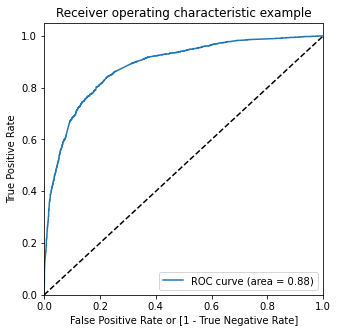

In [111]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.030389,4248,0,1,0,0,0,0,0,0,0,0,0
1,0,0.097168,6779,0,1,0,0,0,0,0,0,0,0,0
2,1,0.268163,8284,0,1,1,1,0,0,0,0,0,0,0
3,0,0.260108,3863,0,1,1,1,0,0,0,0,0,0,0
4,0,0.083578,1703,0,1,0,0,0,0,0,0,0,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.380794     1.000000     0.000000
0.1   0.1  0.611231     0.968150     0.391736
0.2   0.2  0.728028     0.921030     0.609337
0.3   0.3  0.801462     0.828534     0.784814
0.4   0.4  0.814587     0.764398     0.845452
0.5   0.5  0.817245     0.705061     0.886236
0.6   0.6  0.802293     0.593805     0.930507
0.7   0.7  0.783353     0.510471     0.951167
0.8   0.8  0.762751     0.427574     0.968876
0.9   0.9  0.712245     0.263525     0.988194


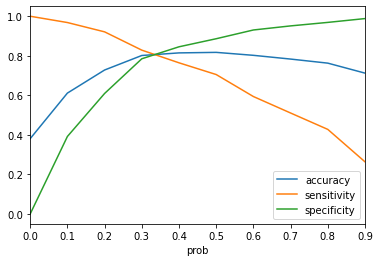

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.030389,4248,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.097168,6779,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.268163,8284,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.260108,3863,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.083578,1703,0,1,0,0,0,0,0,0,0,0,0,0


In [116]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.8014620368832032

In [117]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[2925,  802],
       [ 393, 1899]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8285340314136126

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.784813522940703

In [121]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21518647705929703


In [122]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7030729359496483


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8815551537070524


In [124]:
from sklearn.metrics import precision_score, recall_score

In [125]:
precision_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.792156862745098

In [126]:
recall_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.7050610820244329

### Precision and recall tradeoff

In [127]:
from sklearn.metrics import precision_recall_curve

In [128]:
y_train_pred_final.Lead, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6014    0
 6015    0
 6016    0
 6017    1
 6018    0
 Name: Lead, Length: 6019, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6014    1
 6015    0
 6016    0
 6017    1
 6018    0
 Name: predicted, Length: 6019, dtype: int64)

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

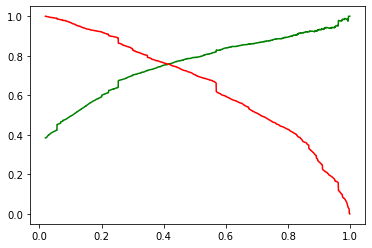

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [131]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [132]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,City_Other than Mumbai,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
1584,-0.343496,-0.102542,-0.653172,0,1,0,0,0,1,1,0,0,0,1,0,0
999,1.326537,2.521777,2.218545,0,0,0,0,0,0,0,0,1,0,0,0,0
681,0.074012,-0.511503,-0.366001,0,0,0,0,0,0,1,0,1,0,0,0,0
4943,0.909029,0.464135,0.208343,0,1,0,0,0,1,0,0,0,0,0,0,0
7485,-0.343496,-0.632541,-0.078829,0,0,0,0,0,0,0,0,1,0,0,0,0


In [133]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1584    0.232013
999     0.742979
681     0.096480
4943    0.749549
7485    0.106582
2094    0.759708
7725    0.962088
8971    0.700126
4584    0.412509
6435    0.834625
dtype: float64

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
1584,0.232013
999,0.742979
681,0.096480
4943,0.749549
7485,0.106582


In [135]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,0
0,0,1584,0.232013
1,1,999,0.742979
2,0,681,0.096480
3,1,4943,0.749549
4,0,7485,0.106582


In [138]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob', 'Converted' : 'Lead'})

In [139]:
y_pred_final.head()

,Lead,ID,Lead_Prob
0,0,1584,0.232013
1,1,999,0.742979
2,0,681,0.096480
3,1,4943,0.749549
4,0,7485,0.106582


In [140]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Lead','Lead_Prob'], axis=1)

y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Lead_Prob.map( lambda x: round(x*100))

# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Lead,Lead_Prob,final_predicted,Lead_Score
0,1584,0,0.232013,0,23
1,999,1,0.742979,1,74
2,681,0,0.096480,0,10
3,4943,1,0.749549,1,75
4,7485,0,0.106582,0,11


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Lead, y_pred_final.final_predicted)

0.812015503875969

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Lead, y_pred_final.final_predicted )
confusion2

array([[1328,  308],
       [ 177,  767]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8125

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.8117359413202934